### Bruna

* Implemente um classificador binário (SGD) para identificar a qual grupo (chd) pertence 0 ou 1 Mostre a acurácia , a matriz de confusão de cada classificador, precisão, recall e f1 score


### Bibliotecas principais 

In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()


from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing


### Banco de dados

In [150]:
db = pd.read_csv('SAheart.csv')

db

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1
...,...,...,...,...,...,...,...,...,...,...
459,214,0.40,5.98,31.72,Absent,64,28.45,0.00,58,0
460,182,4.20,4.41,32.10,Absent,52,28.61,18.72,52,1
461,108,3.00,1.59,15.23,Absent,40,20.09,26.64,55,0
462,118,5.40,11.61,30.79,Absent,64,27.35,23.97,40,0


### Informacoes preliminares

* Observando o banco de dados de forma Geral :

In [7]:
db.shape  #tamanho do banco de dados

(462, 10)

In [9]:
db.dtypes

sbp            int64
tobacco      float64
ldl          float64
adiposity    float64
famhist       object
typea          int64
obesity      float64
alcohol      float64
age            int64
chd            int64
dtype: object

* Quantidade de valores nulos

In [8]:
db.isnull().sum()

sbp          0
tobacco      0
ldl          0
adiposity    0
famhist      0
typea        0
obesity      0
alcohol      0
age          0
chd          0
dtype: int64

* Tratando variaveis categoricas

In [151]:
from sklearn.preprocessing import LabelEncoder

categ_encod = preprocessing.LabelEncoder()
db["famhist"] = categ_encod.fit_transform(db["famhist"])

db["famhist"]

1      1
2      0
3      1
4      1
5      1
      ..
459    0
460    0
461    0
462    0
463    1
Name: famhist, Length: 462, dtype: int64

* valores categoricos

In [27]:
pd.unique(db["famhist"])

array(['Present', 'Absent'], dtype=object)

In [53]:
pd.unique(db["age"])


<function ndarray.sort>

### Levantamento de Hipoteses

* Exploracao do db a partir de dados categoricos

In [17]:
db.groupby('famhist').count()

,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age,chd
famhist,,,,,,,,,
Absent,270,270,270,270,270,270,270,270,270
Present,192,192,192,192,192,192,192,192,192


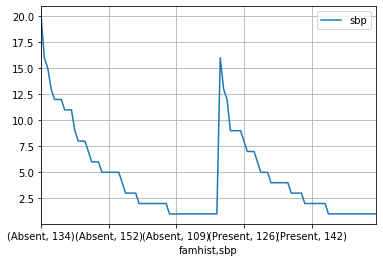

In [22]:
db.groupby('famhist')['sbp'].value_counts().plot(legend = True, grid = True)


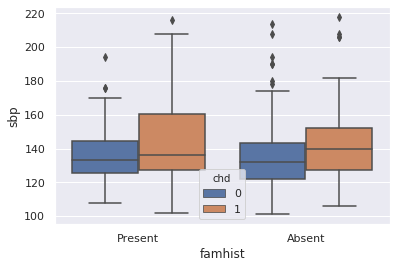

In [54]:
sns.boxplot(x ='famhist', y='sbp', hue = 'chd', data = db)

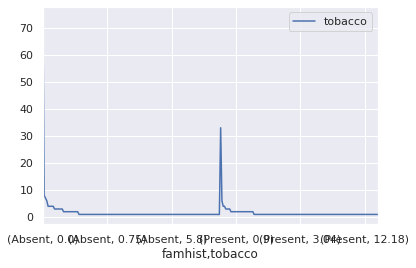

In [79]:
db.groupby('famhist')['tobacco'].value_counts().plot(legend = True, grid = True)

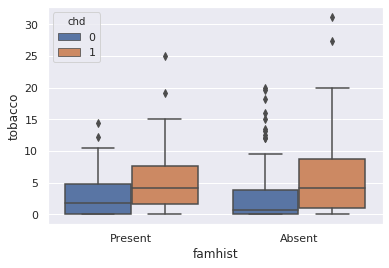

In [55]:
sns.boxplot(x ='famhist', y='tobacco', hue = 'chd', data = db)

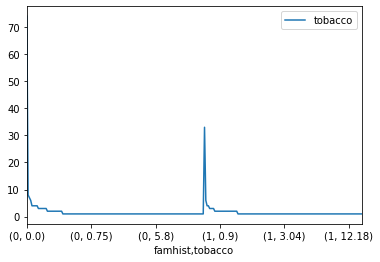

In [14]:
db.groupby('famhist')['tobacco'].value_counts().plot(legend = True)

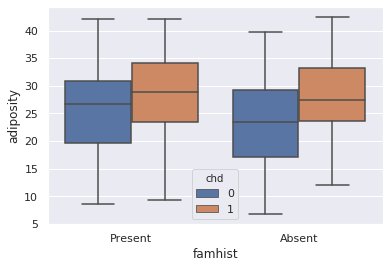

In [58]:
sns.boxplot(x ='famhist', y='adiposity', hue = 'chd', data = db)

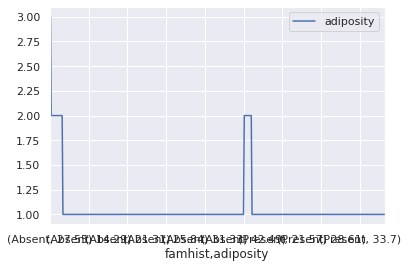

In [83]:
db.groupby('famhist')['adiposity'].value_counts().plot(legend = True, grid = True)

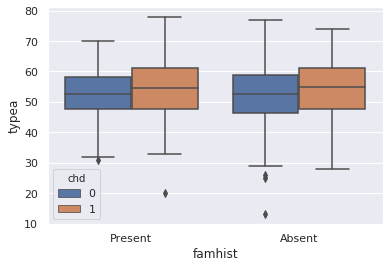

In [59]:
sns.boxplot(x ='famhist', y='typea', hue = 'chd', data = db)

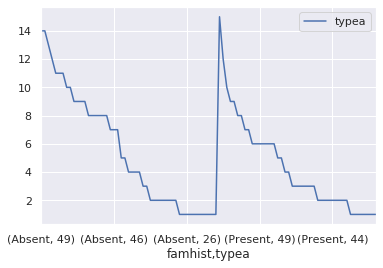

In [85]:
db.groupby('famhist')['typea'].value_counts().plot(legend = True, grid = True)

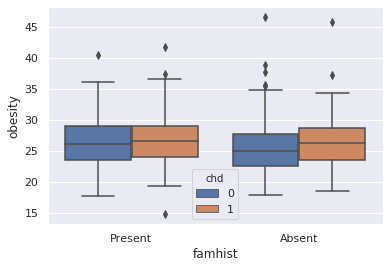

In [60]:
sns.boxplot(x ='famhist', y='obesity', hue = 'chd', data = db)

INVESTIGAR


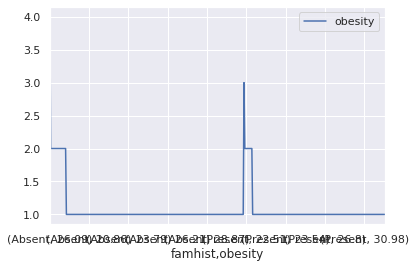

In [87]:
db.groupby('famhist')['obesity'].value_counts().plot(legend = True, grid = True)



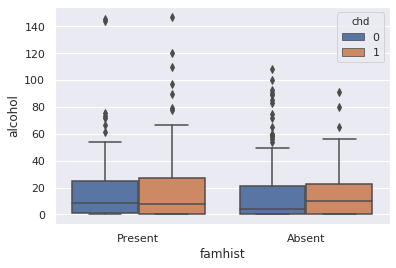

In [61]:
sns.boxplot(x ='famhist', y='alcohol', hue = 'chd', data = db)

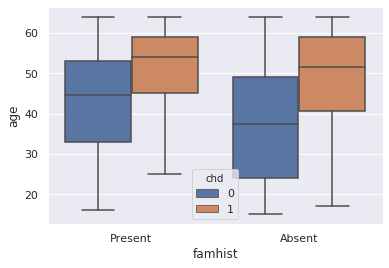

In [62]:
sns.boxplot(x ='famhist', y='age', hue = 'chd', data = db)

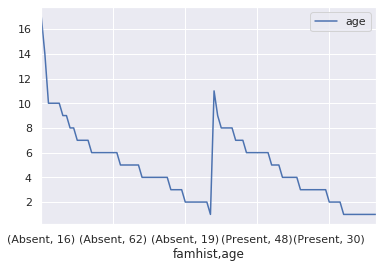

In [89]:
db.groupby('famhist')['age'].value_counts().plot(legend = True, grid = True)

In [123]:
db.corr()

,sbp,tobacco,ldl,adiposity,famhist,typea,alcohol,age,chd
sbp,1.000000,0.212247,0.158296,0.356500,0.085645,-0.057454,0.140096,0.388771,0.192354
tobacco,0.212247,1.000000,0.158905,0.286640,0.088601,-0.014608,0.200813,0.450330,0.299718
ldl,0.158296,0.158905,1.000000,0.440432,0.161353,0.044048,-0.033403,0.311799,0.263053
adiposity,0.356500,0.286640,0.440432,1.000000,0.181721,-0.043144,0.100330,0.625954,0.254121
famhist,0.085645,0.088601,0.161353,0.181721,1.000000,0.044809,0.080520,0.239667,0.272373
typea,-0.057454,-0.014608,0.044048,-0.043144,0.044809,1.000000,0.039498,-0.102606,0.103156
alcohol,0.140096,0.200813,-0.033403,0.100330,0.080520,0.039498,1.000000,0.101125,0.062531
age,0.388771,0.450330,0.311799,0.625954,0.239667,-0.102606,0.101125,1.000000,0.372973
chd,0.192354,0.299718,0.263053,0.254121,0.272373,0.103156,0.062531,0.372973,1.000000


In [266]:
db = pd.read_csv('SAheart.csv')

from sklearn.preprocessing import LabelEncoder

categ_encod = preprocessing.LabelEncoder()
db["famhist"] = categ_encod.fit_transform(db["famhist"])

y = db['chd']

X = db.drop([ 'alcohol', 'chd'], axis=1)  #parece conter um outlier



In [267]:
y

1      1
2      1
3      0
4      1
5      1
      ..
459    0
460    1
461    0
462    0
463    1
Name: chd, Length: 462, dtype: int64

In [268]:
X.dtypes

sbp            int64
tobacco      float64
ldl          float64
adiposity    float64
famhist        int64
typea          int64
obesity      float64
age            int64
dtype: object

### Variaveis utilizadas

X = Banco de dados

X_train = Features para treino   
X_test = Features para teste   
y_train = Targets para treino   
y_test = Targets para teste   



### Divisao de conjuntos

In [285]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.25)

### Treino utilizando o classificador SGDC

In [286]:
sgd_clf = SGDClassifier(random_state=20)  #chama o objeto

In [287]:
sgd_clf.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=20, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

### Avaliacao por matriz de confusao

In [288]:
y_pred = sgd_clf.predict(X_test)

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print("matriz de confusao - analise de falso positivo ou falso negativo: ", cm)



[[14 66]
 [ 0 36]]


In [289]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.17      0.30        80
           1       0.35      1.00      0.52        36

    accuracy                           0.43       116
   macro avg       0.68      0.59      0.41       116
weighted avg       0.80      0.43      0.37       116



In [290]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, y_pred))



0.43103448275862066


In [291]:
from sklearn.metrics import f1_score

print("O indice f1 score eh: ",f1_score(y_test, y_pred))



0.5217391304347826
